# Lesson 6 - Statistics Part 2

![stats2](https://cdns.tblsft.com/sites/default/files/pages/1_napolean_minard.png)

I. Recap of lesson 5  
II. Learning Outcomes  


__Outline for the session:__

1. Introduction to Statistical Inference
2. Data
3. Intro to SciPy
4. Distributions
5. Hypothesis Testing
6. Summary  
7. References  
8. Feedback  

# I. Recap of Lesson 5

In lesson 5, we covered the basics of Statistics as well as two of its major fields, which deal with collecting and describing data. We touched on:

- The shape and form of how data might be collected, structured and unstructured
- Different approaches for collecting data through sampling, observation and experimentation
- The characteristics of measures of central tendency and measures of variability and what each describes
- In-depth descriptive statistics and how to calculate these with plain Python
- We also covered a variety of cross-tabulation methods with `pivot_table()` and the `.groupby()` functions
    - The best way to think of `.groupby()` is by stating: _for each "category or group" show me "x" aggregation by column(s)_.
    - The `pivot_table()` function provides us with more detailed control over the way we cross-tabulate data.

# II. Learning Outcomes

By the end of the lesson you will have learned:

1. What is Statistics Inference and what role does it play in the data analytics cycle.
2. What is a probability density function and how do we represent it.
3. What is hypothesis testing, and which method to use in a variety of circumstances.
4. How to test and evaluate different hypotheses tests.

# 1. Introduction to Statistical Inference

![inf](https://user-images.githubusercontent.com/35218826/37026890-1e2bcfe0-2173-11e8-9b06-3db329d5f477.png)

Statistical inference is one of the divisions of statistics that deals with what cannot (or has not) been observed in the data. It is also the side of statistics used to make predictions about what might happen in the future based on what has happen in the past. In other words, it helps us estimate some degree of uncertainty in the future (something we don't know anything about).

Another way for thinking about inferential statistics goes as follows. We have evidence about the characteristics of all of the observations in our sample, the true parameters of the population are unkown but we can approximate an answer to the true parameters if the sample is large enough. In this scenario, we would like to make an inference or educated guess about the truth. 

Three broad goals of statistical inference are parameter estimation, prediction, and model comparison.

# 2. Data

<img src="https://s29745.pcdn.co/wp-content/uploads/2019/05/Airbnb-Rentals-in-Melbourne.jpg.optimal.jpg" alt="melbourne" width="600"/>  

We will continue using the Melbourne Airbnb data we started using last class. This time though, we will skill the cleaning part build on the statistical concepts used in our previous lesson. Here is a refresher on the data and what we did to it.

1. The data is scraped by a tool called [Inside Airbnb](http://insideairbnb.com/) and we are using a version which was last scraped in 2018.
2. The data contains over 20k rows and each one of them represents a listing for a place to rent.
3. We got rid of data above 400 and below 25.
4. We dealt with missing values by using the median as a proxy.
5. We got rid of more than half of the variables.

We will load the saved version `mel_airbnb_ready.csv`, do a bit of additional cleaning and preparation, and use that data for this lesson.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [2]:
df = pd.read_csv('../Lesson_5/mel_airbnb_ready.csv', parse_dates=['host_since'])

Let's have a quick view of the data again.

In [3]:
df.head(3)

,id,host_since,host_is_superhost,host_identity_verified,city,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,number_of_reviews,review_scores_rating,review_scores_cleanliness,instant_bookable,cancellation_policy,calculated_host_listings_count,min_price_stay,month,year,week,weekday,quarter,day_of_week,week_or_end
0,9835,2009-08-21,f,f,Manningham,-37.77,145.09,f,House,Private room,2,1.00,1.00,2.00,60,55.00,1,22,1,365,30,4,90.00,10.00,f,strict_14_with_grace_period,1,60,8,2009,34,4,3,Friday,week_day
1,10803,2009-09-16,f,t,Moreland,-37.77,144.98,t,Apartment,Private room,2,1.00,1.00,1.00,35,9.00,1,15,3,45,4,108,87.00,8.00,t,moderate,1,105,9,2009,38,2,3,Wednesday,week_day
2,12936,2009-10-31,t,t,Port Phillip,-37.86,144.98,t,Apartment,Entire home/apt,3,1.00,1.00,2.00,159,100.00,2,28,3,28,10,15,94.00,10.00,f,strict_14_with_grace_period,17,477,10,2009,44,5,4,Saturday,weekend


Our columns are.

In [ ]:
df.columns

Let's deal with the extreme values in the cleaning fee and the minimum night by assigning new values to them.

In [4]:
df[['price', 'minimum_nights', 'cleaning_fee']].sort_values(by=['minimum_nights', 'cleaning_fee', 'price'], ascending=False).head(15)

,price,minimum_nights,cleaning_fee
9650,143,1125,75.00
15734,148,1125,65.00
10863,80,1120,20.00
15455,179,1000,88.00
1352,219,1000,55.00
15157,60,1000,55.00
11642,40,1000,55.00
19271,35,1000,55.00
10846,199,900,100.00
4456,35,900,45.00


In [5]:
df[['price', 'minimum_nights', 'cleaning_fee']].sort_values(by=['cleaning_fee', 'minimum_nights', 'price'], ascending=False).head()

,price,minimum_nights,cleaning_fee
17196,332,1,867.00
18198,399,120,500.00
7979,150,1,500.00
20283,251,15,450.00
17094,278,3,440.00


In [6]:
df.loc[17196]

id                                                   26261824
host_since                                2018-06-23 00:00:00
host_is_superhost                                           f
host_identity_verified                                      f
city                                                Melbourne
latitude                                               -37.81
longitude                                              144.96
is_location_exact                                           f
property_type                                       Apartment
room_type                                     Entire home/apt
accommodates                                               12
bathrooms                                                2.00
bedrooms                                                 3.00
beds                                                     6.00
price                                                     332
cleaning_fee                                           867.00
guests_i

In [14]:
min_night_mask = (df['minimum_nights'] > 499) #filter out the extreme
df.loc[min_night_mask, 'minimum_nights'] = round(df['minimum_nights'].median())

Stays where cleaning costs more than double the stay per night should be dealt with too. We will create a mask and assign the median of the array to those values.

In [15]:
clean_mask = ((df['minimum_nights'] < 4.00) & (df['price'] < df['cleaning_fee'])) 
df.loc[clean_mask, 'cleaning_fee'] = df['cleaning_fee'].median()

In [16]:
df['min_price_stay'] = (df['price'] * df['minimum_nights'])

Let's add a new column to represent the true price of a stay at an Airbnb in Melbourne. This should be the `Price per Night * Minimum Nights per Stay + Cleaning Fee = True Price`. We will name our new column, `true_price`.

In [10]:
df['true_price'] = (df['price'] * df['minimum_nights'] + df['cleaning_fee'])
df['true_price'].head()

0   115.00
1   114.00
2   577.00
3   115.00
4    84.00
Name: true_price, dtype: float64

In [12]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 3E11-2255

 Directory of C:\Users\mdeane\PythonDA\python-class\Lesson_6

06/06/2020  10:49 AM    <DIR>          .
06/06/2020  10:49 AM    <DIR>          ..
06/06/2020  09:40 AM    <DIR>          .ipynb_checkpoints
06/06/2020  10:49 AM            58,759 lesson_6.ipynb
06/06/2020  09:16 AM             2,984 stats_2_mini_assessment.ipynb
06/06/2020  09:36 AM            12,988 Untitled.ipynb
06/06/2020  10:12 AM            11,657 Untitled1.ipynb
               4 File(s)         86,388 bytes
               3 Dir(s)  640,266,821,632 bytes free


In [17]:
df.to_csv('cleaner_melb_abnb.csv', index=False)

# 3. Intro to SciPy

![scipy](https://www.fullstackpython.com/img/logos/scipy.png)  
**Source:** [SciPy](https://www.scipy.org/scipylib/index.html)

SciPy stands for Scientific Python and it is a library with the goal of making scientific data analysis easier. The name SciPy is often used as a reference to the main python ecosystem of libraries availables for data analysis, of which the most widely known libraries are pandas, numpy, matplotlib, and, of course, SciPy.

SciPy has many tools and submodules in it with the most famous ones being

- `linalg` --> a sub-module for linear algebra applications
- `stats` --> the statistical sub-module we explored in the previous lesson
- `optimize` --> great tool for optimization problems
- `signal` --> for signal processing
- many more...

For our purposes, we will be using the `stats` sub-module for hypothesis testing and other applications.


You should have SciPy already installed in your computer, but just in case you need to reinstall it again, here is the code to so:
```sh

!pip install scipy
```

Let's import the `stats` sub-module from the scipy library and then continue on to the next section.

In [ ]:
# Only use this if the command below fail
!pip install scipy

In [18]:
from scipy import stats

# 4. Distributions

![florence](https://cdn8.openculture.com/wp-content/uploads/2016/03/27203643/1024px-Nightingale-mortality.jpg)  
**Source:** Florence Nightingale

Statistical distributions are a tool to represent our dataset and a way to approximate reality. Distributions allow us to see how the likelihood or probability or different measurements (e.g., prices, weights, temperature, ect.) are distributed. The mountain or peak of a distributions show the most likely data points we will encounter, while the tails of a distribution let us see the most unlikely events.

Distributions are usually visualised using histograms, and histrograms represent information or data by grouping each observation into bins. Aside from allowing us to visually inspect the data, histograms also give us a way to estimate how likely we are to find an observation taken at random, inside any of the bins. The more observations we gather about X phenomena, e.g. the more price per night data for new listings in our Airbnb dataset, the more spread out and smooth our histogram might become.

We are also able to pass curve through a histogram to show a smooth approximation of the data point to a given bin, and we can also represent the probability of seeing a data point that we don't have in our sample.

The kind of distribution we have been referring to so far is that one where there is only one peak, and to an extent, only one shape. Because different distributions share different kinds of features, there are other types of distributions such as:

### Discrete distributions

- There are discrete distributions where all outcomes are equaly likely (e.g. picking a card from a deck or rolling a die), these are said to follow a **Uniform distribution**.
- Other discrete distributions, such as those that only have two potential outcomes, true or false, yes or no, follow what we call a **Bernoulli distribution**.
- When we calculate many yes or no distributions and plot them on a graph, we have what is called a **Binomial distribution**.
- There are also distributions that allow us to calculate the probability of very rare events, such as the **Poisson distribution**.


### Continuous distributions

Continuous distributions can be represented more easily by a curve as opposed to binned bars, and that is because the data point in such an array usually has float values (e.g. price per house, income, termperature, height, weight, etc.).
- The most common distribution we see of the continuous kind is the **normal distribution**. Which is very closely represented by natural events such as precipitaion, snow measurements in inches, etc. Even though the of a normal distribution resembles well rounded mountain, we can often encounter many rare events called outliers, and we can also be presented with very little information about a phenomenon (e.g., there was very little evidence of COVID-19 prior to 2019). To represent different events with distributions, we have a few options
- **Student's T distribution** is a special distribution that allows us to accommodate extreme values very well. Think of this distribution as a mountain with a smaller peak and fatter flat sides. The lower number of elements would make the occurance of the extreme values represent a higher population than they would otherwise
- **Chi-Squared distribution** always contain non-negative numbers and also always asymmetric. This means that they don't have a typical mountain and will always start after 0 in the origin of any x-y coordinates. This distribution is very useful for hypothesis testing but it often lacks in its inability to truly represent reality.
- **Exponential distributions** represent rapidely changing events such as epidemics or stock market crashes.
- **Logistic or Sigmoid distribution** allows us to forecast different events and also determine the cut off point where an event happens. This distribution is oftern used in classification algorithms to tell us whether an image has a cat or a dog, and email is spam or not, or if we have rain or no rain.

Let's plot each one of these distributions to see what they look like.

## Normal Distribution

The normal distribution tells us that the distribution of our data has a peak where the mean, the median, and the mode are the same and the standard deviation, a.k.a. the dispersion of our data, is normal or smooth as well. We will first generate a random array using the `norm` sub-module from SciPy's stats.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

df = pd.read_csv('cleaner_melb_abnb.csv', parse_dates=['host_since'])

In [19]:
from scipy.stats import norm

In [20]:
# the rvs method generates random variations based on a mean and an std
normal_dist = norm.rvs(loc=0, scale=1, size=100, random_state=None)

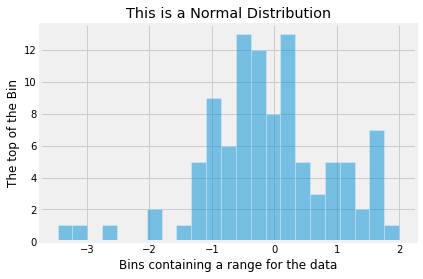

In [21]:
plt.hist(normal_dist, bins=23, edgecolor='white', alpha=0.5)
plt.title("This is a Normal Distribution")
plt.xlabel("Bins containing a range for the data")
plt.ylabel("The top of the Bin")
plt.show()

We can also change the bins and add a line which shows us the probability of an event occuring at a point where no data has been observed yet.

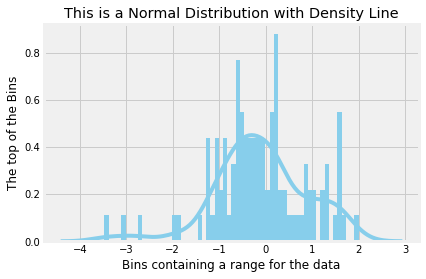

In [22]:
sns.distplot(normal_dist, bins=60, kde=True,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})

plt.title("This is a Normal Distribution with Density Line")
plt.xlabel("Bins containing a range for the data")
plt.ylabel("The top of the Bins")
plt.show()

## Bernoulli

In [23]:
from scipy.stats import bernoulli

In [24]:
berni_dist = bernoulli.rvs(size=10000,p=0.6)

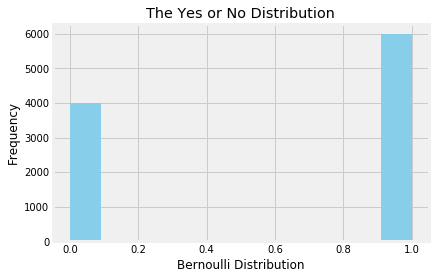

In [25]:
ax= sns.distplot(berni_dist, kde=False,
                 color="skyblue", hist_kws={"linewidth": 15,'alpha':1})

plt.xlabel('Bernoulli Distribution')
plt.ylabel('Frequency')
plt.title("The Yes or No Distribution")
plt.show()

## Uniform

Uniform distributions are usually flat and squared.

In [26]:
from scipy.stats import uniform

In [27]:
uni_dist = uniform.rvs(loc=30, scale=4, size=100)

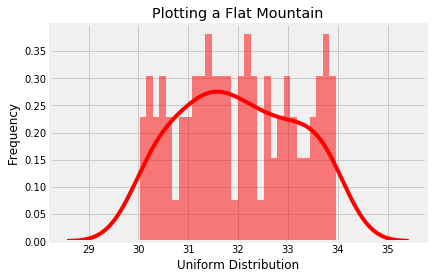

In [28]:
sns.distplot(uni_dist, bins=30,
                  kde=True, color='red',
                  hist_kws={"linewidth": 15,'alpha':0.5})

plt.xlabel('Uniform Distribution')
plt.ylabel('Frequency')
plt.title("Plotting a Flat Mountain")
plt.show()

## Exponential

In [29]:
from scipy.stats import expon

In [30]:
expo_dist = expon.rvs(scale=1,loc=0,size=1000)

Text(0.5, 1.0, 'Expo Func')

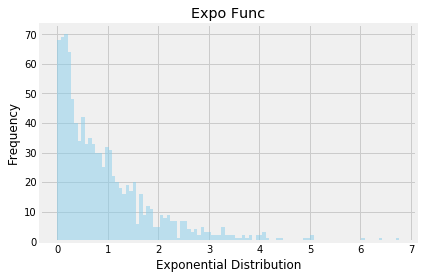

In [31]:
sns.distplot(expo_dist, kde=False, bins=100, color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':0.5})

plt.xlabel('Exponential Distribution')
plt.ylabel('Frequency')
plt.title("Expo Func")

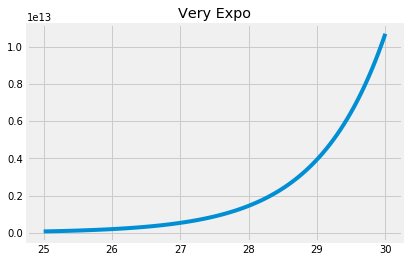

In [32]:
arr1 = np.linspace(25, 30, 100)
exp = np.exp(arr1)
plt.plot(arr1, exp)
plt.title("Very Expo")
plt.show()

## Poisson

In [33]:
from scipy.stats import poisson

In [34]:
poisson_dist = poisson.rvs(mu=3, size=10000)

Text(0.5, 1.0, 'Poisson')

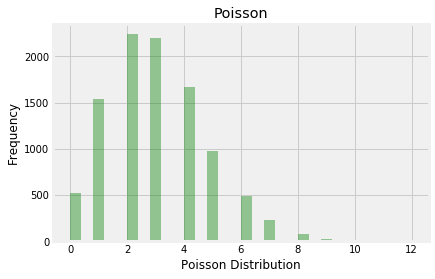

In [35]:
sns.distplot(poisson_dist, bins=30, kde=False,
             color='green', hist_kws={"linewidth": 15,'alpha':0.4})

plt.xlabel('Poisson Distribution')
plt.ylabel('Frequency')
plt.title("Poisson")

## Sigmoid

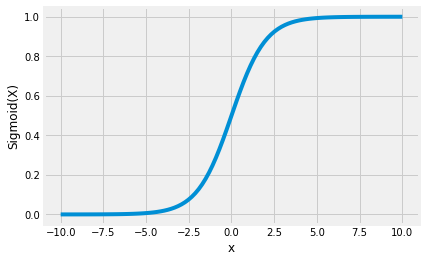

In [36]:
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

# 5. Hypothesis Testing

<img src="https://imgs.xkcd.com/comics/null_hypothesis.png" alt="null h" width="300"/>  
**Source:** https://xkcd.com/892/

As data analysts, we will often want to test a variety of questions with our data to improve and enhance the decision-making process of our organisations. We will also want to know whether these questions hold true against the evience we currently have, and to do this, we turn to the inferential side of statistics to compare a variety of methods suitable for different data types.

Since we assume the data we have comes from some type of real distribution in the actual population, hence, when we answer a hypothesis test we are doing so in terms of the whole population and not the sample from which the data was taken. Because of the large space of questions we can asks for different data, we will have different flavors of hypotheses **tests** to choose from. Before we move on, let's define what a hypothesis is in a general way.

> "A hypothesis is a question, premise, claim or idea that we want to test using data"

The most basic elements of a hypothesis are
- $H_{0}$ --> (pronounced H of not) is the Null Hypothesis or **the idea that we want to disprove.** You can also think of this as the status quo or what has already been accepted by the majority but not proven false yet.
- $H_{A}$ --> (pronounced H of A) is the alternative hypothesis we want to test and hopefully prove right. It is also called the research hypothesis.
- Statistical significance --> the measure or place where we draw the line to be able to say that our results are strong enough to disprove what is currently accepted.
- Reject $H_{0}$ --> this is the result we get when we do find evidence against the status quo or accepted view or idea.
- Fail to reject $H_{0}$ --> this is the result we get when we are unable to disproved the accepted idea.
- Level of Confidence --> usually set to 95%. Is our degree of confidence in our decision. For example, if we are rejecting a null hypothesis we could say, "I am 95% confident that rejecting the null hypothesis is a valid conclusion.
- $\alpha$ --> Is the level of significance of our decision. This is calculated by subtracting 95% from 1 (e.g. $\alpha = 1 - 95%$ and it is the explicit threshold by which the probability we get from our result needs to be for us to make our decision. For example, the probability estimate generated from our hypothesis test has to be below 0.05 for it to be meaningful to us.
- $p-value$ --> Is the probability or result we get from a hypothesis test. It allows to prove or dispruve our assumptions. The way we use p-values is by comparing this result with our level of significance $\alpha$. In other words
    - If $p-value > \alpha$ we **fail to reject** the Null Hypothesis
    - If $p-value < \alpha$ we **reject** the Null Hypothesis. Another way of wording this: There is a 5% chance that two identical distributions would have produce the results we are observing.  
Formal definition of the p-value
> Probability of obtaining a sample more extreme than the ones observed in your data, assuming that the Null Hypothesis is true.

Think about the last two elements above in terms of the guinness world records, until someone comes and beats a record in that book, we cannot disprove him/her/they/them as the true record holder. The case is the same for hypothesis testing.

Notice from the above statements that we can infer that no hypothesis is ever fully true just not proven false until something better comes up. Always keep this in ming as you move along your data analytics journey. Also, since in order test a hypothesis we will need past data, questions that lack data will have no foundation to be tested on. For example

- Do eagles fly faster than armadillos? Until armadillos can fly and we gather data about how they do, this will remain an untestable hypothesis.
- Will robots take over the world? No data exists on this. There are a lot of fun science fiction movies though.
- Will aliens invade us 10 years? ...

The steps for hypothesis testing roughly follow the structure below.
1. What kind of data do we have: Categorical or Quantitative?
2. How many samples am I comparing?
3. We then need to formulate our question. 
    - Is the average price of all Airbnb listings in Melbourne truly 124.7?
        - $H_{0}:\mu_{0} = 124.7$ 
        - $H_{A}:\mu_{0} \neq 124.7$
        - The two hypotheses above can be thought of as mathematical opposite questions.
4. Which test do we need to use in order to test our hypothesis?
5. Test your hypothesis with your chosen test.
6. Use that information to make your decisions.

### Sides of a hypothesis

<img src="https://miro.medium.com/max/862/1*VXxdieFiYCgR6v7nUaq01g.jpeg" alt="h-sides" width="700"/> 


### Testing options given your data

| Comparison | Data you have | Test Available |
|-----|---------|----|
| 1 Sample vs Known Population | categorical | Binomial Test |
| 1 Sample vs Known Population | numerical | 1 Sample t-test |
| 2 Samples | categorical | Chi-Square |
| 2 Samples | numerical | 2 Sample t-test |
| More than 2 | categorical | Chi-Square |
| More than 2 | numerical | ANOVA and/or Tukey |


Another way of reframing hypothesis testing is by asking

> What is the probability that the difference I am observing is due to chance?

Lastly, remember that the goal of hypothesis testing is to disprove the Null Hypothesis.

We will now state a variety of hypotheses, test them using their appropriate method, and explain that method in detail as we go along.

Our first question - What kind of 

## Example 1

Imagine we know that the average price per stay for the last five years in all of Melbourne's Airbnb listings was 124/night. Then, the next year we get new data and the average price goes to 123, and the next it goes to 122,, then 121, and on it goed. Given this information, we would start loosing confidence that true value, say 124.7, is not the true average but a value due to chance. To test this, we would use a 1 Sample t-test.

> The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesized population mean.

Here is how we would go about testing our hypothesis in python with the data we actually have.

It is good practice to always state your questions before proceeding to code the test, and also to visualise the distribution of the variable.

- $H_{0}:\mu_{0} = 124.7$
- $H_{A}:\mu_{0} \neq 124.7$

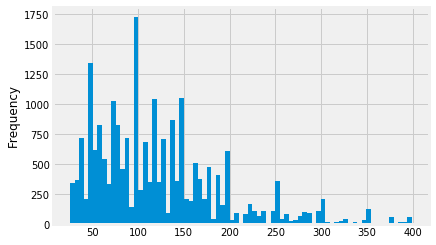

In [37]:
df['price'].plot(kind='hist', bins=75)
plt.show()

In [38]:
from scipy.stats import ttest_1samp

In [39]:
# the first argument is our array
# the second is our hypothesised population mean

tstat, pval = ttest_1samp(df['price'], 123)
print("Our P-values is %.4f" % pval)

if pval > 0.05:
    print('We Fail to Reject the Null Hypothesis!')
else:
    print('We Reject the Null Hypothesis!')

Our P-values is 0.0288
We Reject the Null Hypothesis!


The 1 sample t-test allows us to test whether the distribution of a variable is significantly different than our chosen mean. In our case, a value of 123 gives us enough confidence to say that the average mean is not a conclusive figure and thus, we can reject the Null Hypothesis.

**Note:** If we don't select a confidence level, the default will be `0.05`.

## Example 2

Here we want to compare two sample distributions in our dataset, which we assume are normally distributed. We take two groups given a condition and we compare the mean of both arrays.

Definition:

> The purpose of the test is to determine whether there is statistical evidence that the mean difference between paired observations on a particular outcome is significantly different from zero.

Our confidence level is again `0.05`. This means that any p-value below that would allows to see whether there is a significant difference between the average price of these two categories or not.

- $H_{0}:$ samples average are the same
- $H_{A}:$ samples average is not the same

In [40]:
from scipy.stats import ttest_ind

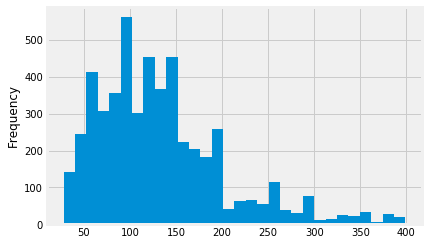

In [41]:
# let's separate the arrays and assign them to a variable
super_host = df.loc[df['host_is_superhost'] == 't', 'price']
regular_host = df.loc[df['host_is_superhost'] == 'f', 'price']

super_host.plot(kind='hist', bins=30)
plt.show()

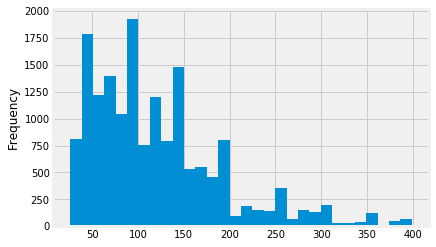

In [42]:
regular_host.plot(kind='hist', bins=30)

In [43]:
tstat, pval = ttest_ind(super_host, regular_host, equal_var=False)

print("Our P-values is %.4f" % pval)

if pval > 0.05:
    print('We Fail to Reject the Null Hypothesis!')
else:
    print('We Reject the Null Hypothesis!')

Our P-values is 0.0000
We Reject the Null Hypothesis!


Notice how there is a significant difference between the average of both variables.

## Example 3

Analysis of Variance (ANOVA) allows us to compare the average value of more than 2 samples to see whether there is a statistically significant difference between them.

Assumptions

- Samples are independent and identically distributed.
- Each of the multiple samples are normally distributed.
- Observations in each sample have the same variance.

  

- $H_{0}:$ samples averages are the same
- $H_{A}:$ samples averages are not the same

In [44]:
from scipy.stats import f_oneway

In [45]:
df['room_type'].value_counts()

Entire home/apt    13491
Private room        7911
Shared room          289
Name: room_type, dtype: int64

In [46]:
entire_home = df.loc[df['room_type'] == 'Entire home/apt', 'min_price_stay']
private_room = df.loc[df['room_type'] == 'Private room', 'min_price_stay']
shared_room = df.loc[df['room_type'] == 'Shared room', 'min_price_stay']

We will first compare the prices charged by the three room types in our dataset. Notice how the output of the test is a tuple with the test statistic, a values we can compare against a variety of probabilities in a table, and the p-value. What we are interested in.

In [47]:
stat, pval = f_oneway(entire_home, private_room, shared_room)

print("Our P-values is %.4f" % pval)

if pval > 0.05:
    print('We Fail to Reject the Null Hypothesis!')
else:
    print('We Reject the Null Hypothesis!')

Our P-values is 0.0000
We Reject the Null Hypothesis!


In [48]:
price = df['price']
min_price_stay = df['min_price_stay']
full_pay = df['true_price']
clean_fee = df['cleaning_fee']

In [49]:
stat, pval = f_oneway(price, min_price_stay, clean_fee)

print("Our P-values is %.4f" % pval)

if pval > 0.05:
    print('We Fail to Reject the Null Hypothesis!')
else:
    print('We Reject the Null Hypothesis!')

Our P-values is 0.0000
We Reject the Null Hypothesis!


The caveat with ANOVA's is that they don't tell us which sample is more signficantly different than other. To accomplish this level of granularity, we need another test called the Tukey test.

The Tukey's range test compares several numerical samples (more than 2) without increasing the probability of a false positive (e.g. a false interpretation that was taken as true).

To compute it, we need to append all three arrays into a vertical one, along with the names of each array. Let's first import the `pairwise_tukeyhsd` model from statsmodel and then calculate the result.

In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [51]:
vertical_stack = np.concatenate([price, min_price_stay, clean_fee])

In [52]:
labels = ['price'] * len(price) + ['min_price_stay'] * len(min_price_stay) + ['clean_fee'] * len(clean_fee)

In [53]:
tukey_test = pairwise_tukeyhsd(vertical_stack, labels, 0.05)
print(tukey_test)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1         group2      meandiff p-adj  lower     upper   reject
-----------------------------------------------------------------------
     clean_fee min_price_stay  341.6657 0.001  322.371  360.9604   True
     clean_fee          price   66.3835 0.001  47.0888   85.6782   True
min_price_stay          price -275.2822 0.001 -294.577 -255.9875   True
-----------------------------------------------------------------------


## Example 4

Pearson Correlation

We saw the pearson correlation function in the last class, but what does it really test? The goal of this test is see whether there is a linear relationship between your numerical variables or not. That means that we want to know whether the variables have dependency or not with one another. 


- $H_{0}:$ samples average are independent
- $H_{A}:$ there is dependency between the samples

In [54]:
from scipy.stats import pearsonr

In [55]:
stat, pval = pearsonr(price, min_price_stay)

print("Our P-values is %.4f" % pval)

if pval > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Our P-values is 0.0000
Probably dependent


## Example 6

Spearman’s Rank Correlation

Is used to discover the strength of a link between two sets of data. For example, the price per night versus the cleaning fee of a listing.

- $H_{0}:$ samples average are independent
- $H_{A}:$ there is dependency between the samples

In [56]:
from scipy.stats import spearmanr

stat, pval = spearmanr(price, clean_fee)

print("Our P-values is %.4f" % pval)

if pval > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Our P-values is 0.0000
Probably dependent


# 6. Summary

- Inferential statistics help us deal with uncertainty and estimate the parameters of the true population
- Distributions are a key component to understand how we model reality
- A hypothesis test helps us disprove statements and knowledge that has not been disproved yet
- SciPy's stats model has plenty of useful functionalities for statistical analysis
- There many, many hypothesis tests and we have only scratched the surface here

# 7. References

Herne, H., & Huff, D. (1973). _How to Lie with Statistics_. Applied Statistics, 22(3), 401. doi: 10.2307/2346789

Downey, Allen B. _Think Stats: Exploratory Data Analysis in Python_. Green Tea Press, 2014.

Lock, Robin H., et al. _Statistics: Unlocking the Power of Data_. John Wiley & Sons, 2019.

# 8. Feedback

We would really appreciate it if you could please provide us with your feedback from this session by filling a couple of question.

> ## [Survey](https://docs.google.com/forms/d/e/1FAIpQLScsvD4KHRJZPstPHZlAv5ibNOvL9ioSgQRCrIIqwQzW_mG8Og/viewform?usp=sf_link)